# Santiago Matallana - UCID 444585

Computation for Public Policy - Homework Assignment 2

In [1]:
import pandas as pd
pd.options.display.max_rows = 6
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]

## Question 1: Crime counts and socioeconomics
Download the crime data for all of the year 2015. Also download the socioeconomic data.

I eliminated the two entries for Community Area '0'. That is 2 out of 258515 rows.

In [2]:
crimes = pd.read_csv('Crimes_-_2001_to_present.csv', parse_dates = ['Date'])
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10201852,HY389096,2015-01-01,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,1,24,26,1159250,1905420,2015,08/20/2015 04:17:37 PM,41.896198,-87.690553,"(41.896197984, -87.690552821)"
1,10060114,HY239140,2015-01-01,069XX S CORNELL AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,...,5,43,20,1188551,1859284,2015,08/17/2015 03:03:40 PM,41.768946,-87.584415,"(41.768945532, -87.584414851)"
2,10210454,HY397301,2015-01-01,049XX W WABANSIA AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,37,25,02,NaN,NaN,2015,08/31/2015 03:43:09 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258510,10364335,HY556149,2015-12-31,037XX W ARGYLE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,39,14,14,1150389,1932961,2015,01/07/2016 04:14:34 PM,41.971950,-87.722377,"(41.971950353, -87.722376878)"
258511,10371800,HZ106801,2015-12-31,019XX N Hoyne Ave,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,32,22,11,1162044,1913082,2015,01/15/2016 11:08:45 AM,41.917165,-87.680077,"(41.917165184, -87.680076699)"
258512,10364402,HY556328,2015-12-31,051XX S BLACKSTONE AVE,0810,THEFT,OVER $500,STREET,False,False,...,4,41,06,1186787,1871326,2015,01/07/2016 04:14:34 PM,41.802032,-87.590499,"(41.802031713, -87.59049938)"


In [3]:
socioeconomic = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
socioeconomic

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
...,...,...,...,...,...,...,...,...,...
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24
76,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19
77,NaN,CHICAGO,4.7,19.7,12.9,19.5,33.5,28202,NaN


### (a): Calculate the number of crimes in each Community Area in 2015.

In [4]:
# Group crimes by Community Area
crimes_by_community = crimes.groupby('Community Area')

# Aggregate count by Community Area
community_crime_count = crimes_by_community['ID'].agg('count')
community_crime_count.to_frame()

,ID
Community Area,
1,3519
2,3059
3,3585
...,...
75,2052
76,1622
77,2209


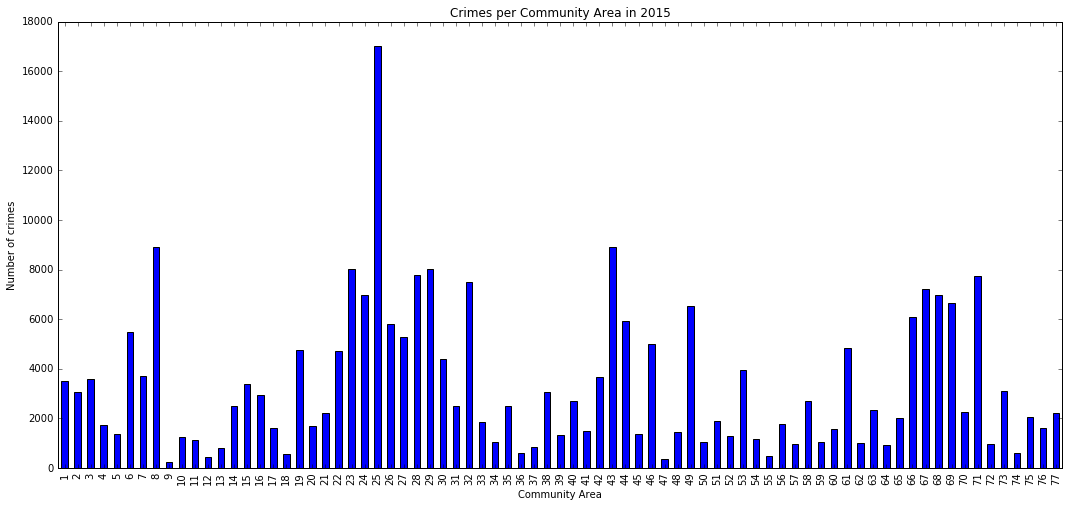

In [5]:
community_crime_count.plot(kind = 'bar', title = 'Crimes per Community Area in 2015',
                          legend = False)
plt.xlabel('Community Area')
plt.ylabel('Number of crimes')

### (b) Sort the Community Areas by 2015 crime count. Which Community Area (by name) has the highest crime count. The lowest?

In [6]:
community_crime_count.sort_values(ascending = False).to_frame()

,ID
Community Area,
25,17020
8,8920
43,8906
...,...
12,444
47,380
9,254


Austin (Community Area 25) has the highest crime count, and Edison Park (Community Area 9) the lowest.

### (c) Create a table whose rows are days in the year and columns are the 77 Community Area crime counts. Select a few Communities that you are interested and plot time series.

In [7]:
# Create function to strip time from date field, and use it to create another column
def to_day(timestamp):
    return timestamp.replace(minute=0,hour=0, second=0)

crimes['Day'] = crimes['Date'].apply(to_day)

In [8]:
# Group by both Community Area and Day
crimes_by_community_day = crimes.groupby(['Community Area', 'Day'])
# Aggregate count by Community Area
crimes_by_community_day_count = crimes_by_community_day['ID'].agg('count')

In [9]:
# Unstack to get days on rows and Community Areas on columns
community_crimes_timeseries = crimes_by_community_day_count.unstack('Community Area')
community_crimes_timeseries

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13,7,11,4,5,22,12,43,1,5,...,29,23,9,44,2,8,2,5,6,8
2015-01-02,5,9,8,3,2,10,9,27,NaN,2,...,12,21,5,17,1,11,1,2,6,5
2015-01-03,7,11,9,7,4,6,11,27,1,3,...,23,12,8,18,NaN,8,1,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,6,7,12,8,3,8,5,25,NaN,1,...,18,16,7,18,NaN,8,3,2,2,4
2015-12-30,5,8,7,4,1,11,15,27,1,6,...,11,23,6,14,2,8,1,7,5,5
2015-12-31,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Replace missing values for zeros
community_crimes_timeseries.fillna(0, inplace=True)
community_crimes_timeseries

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,13,7,11,4,5,22,12,43,1,5,...,29,23,9,44,2,8,2,5,6,8
2015-01-02,5,9,8,3,2,10,9,27,0,2,...,12,21,5,17,1,11,1,2,6,5
2015-01-03,7,11,9,7,4,6,11,27,1,3,...,23,12,8,18,0,8,1,7,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,6,7,12,8,3,8,5,25,0,1,...,18,16,7,18,0,8,3,2,2,4
2015-12-30,5,8,7,4,1,11,15,27,1,6,...,11,23,6,14,2,8,1,7,5,5
2015-12-31,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


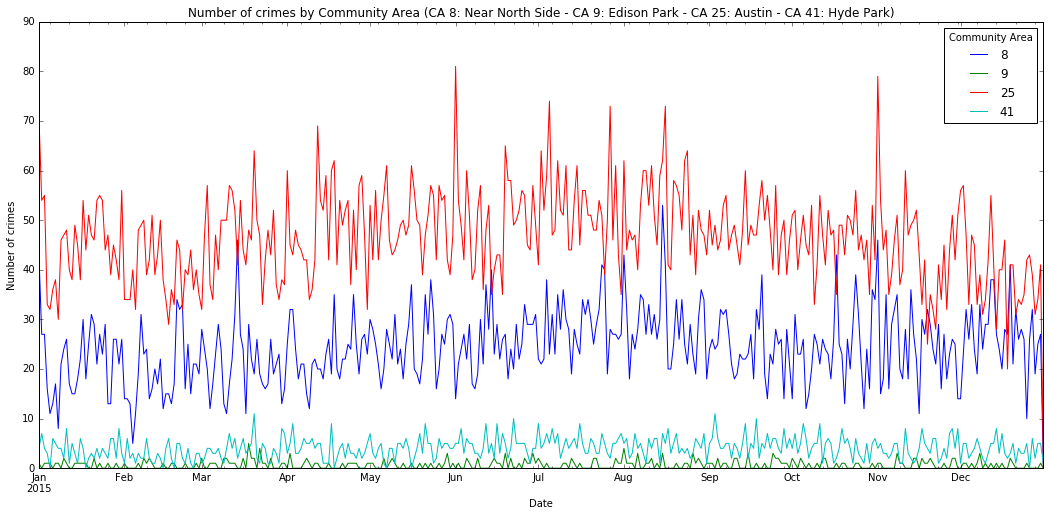

In [11]:
community_crimes_timeseries[[8, 9, 25, 41]].plot(title = \
 'Number of crimes by Community Area (CA 8: Near North Side - CA 9: Edison Park - CA 25: Austin - CA 41: Hyde Park)')
plt.xlabel('Date')
plt.ylabel('Number of crimes')

### (d) By joining with the socioeconomic data, create a scatter plot of crime counts against per capita income. Summarize the relationship in words.

In [12]:
# Turn series into Data Frame
community_crime_count = pd.DataFrame({'Crime Count': community_crime_count})
community_crime_count

,Crime Count
Community Area,
1,3519
2,3059
3,3585
...,...
75,2052
76,1622
77,2209


In [13]:
# Merge 'socioeconomic' and 'community_crime_count' datasets by Community Area.
socioeconomic_crime = socioeconomic.merge(community_crime_count, 
                                          left_on='Community Area Number', right_index = 'Community Area')
socioeconomic_crime

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Count
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,3519
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,3059
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,3585
...,...,...,...,...,...,...,...,...,...,...
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,2052
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,1622
76,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19,2209


(0, 20000)

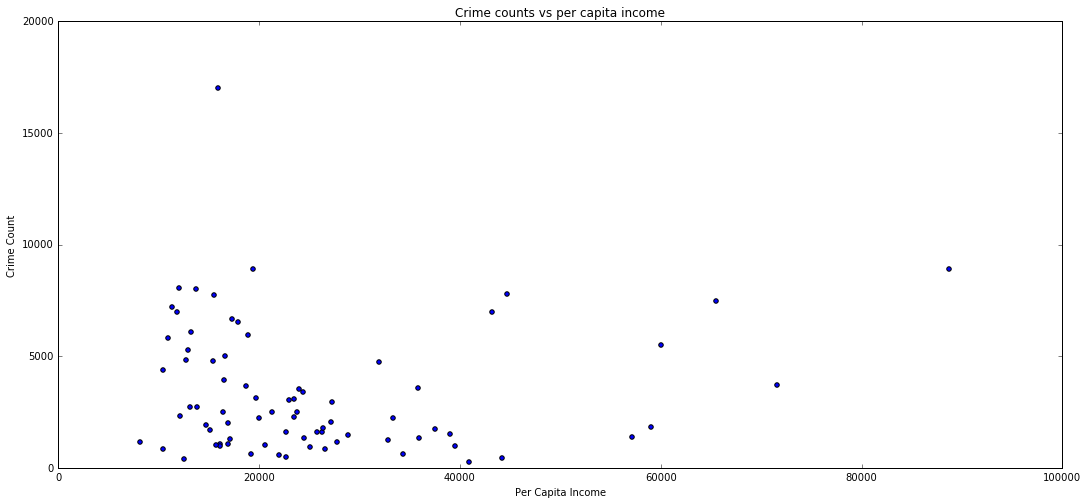

In [14]:
socioeconomic_crime.plot(kind = 'scatter', x = 'PER CAPITA INCOME ',
                         y = 'Crime Count', title = 'Crime counts vs per capita income')
plt.ylabel("Crime Count")
plt.xlabel("Per Capita Income")
plt.subplot().set_ylim(0,20000)

It is not clear from the scatterplot what the relation between these variables is. Intuiton indicates that there is an inverse relation between income and crime, which is consistent with the point at the top left corner of the graph (Austin). However, that intuition is not right since crime is frequent also in Community Areas (CA) of high per capita income. Actually, Near North Side is the second CA with the highest number of crimes in 2015, and it is also, by far, the one with the highest per capita income. (See point farthest to the right.)

## Question 2: Community Area populations
Download the census block population data and the Community Area tracts mapping.

In [15]:
population = pd.read_csv('Population_by_2010_Census_Block.csv')
population

,CENSUS BLOCK,TOTAL POPULATION
0,310003002,104
1,310003003,46
2,310003004,40
...,...,...
46288,8419002054,131
46289,8419002055,79
46290,8419002056,20


In [16]:
tracts = pd.read_csv('community_tracts.csv')
tracts

,tract_id,community_id
0,17031842400,44
1,17031840300,59
2,17031841100,34
...,...,...
798,17031130300,13
799,17031292200,29
800,17031630900,63


### (a) Join these together using the fact that the last six digits of the tract id in the mapping data correspond to the first six digits of the block id. However, the data portal has a bug: if the block starts with a zero, that digit is missing!

In [17]:
# Function to get id from tracts dataset.
# It extracts the last 6 digits of its argument
def get_id_tract(x):
    return str(x)[-6:]    

In [18]:
# Apply function to every element in 'tract_id'
tracts["ID_merge"] = tracts["tract_id"].apply(get_id_tract)
tracts["ID_merge"].to_frame()

,ID_merge
0,842400
1,840300
2,841100
...,...
798,130300
799,292200
800,630900


In [19]:
# Function to get id from population dataset.
# If the length of the census block is 9, it extracts the first 5 digits
# and adds a 0 at the beginning. Otherwise, extracts the first 6 digits of the block
def get_id_block(x):
    if len(str(x)) == 9:
        return '0' + str(x)[:5]
    else:
        return str(x)[:6]

In [20]:
# Apply function to every element in 'CENSUS BLOCK'
population["ID_merge"] = population["CENSUS BLOCK"].apply(get_id_block)
population["ID_merge"].to_frame()

,ID_merge
0,031000
1,031000
2,031000
...,...
46288,841900
46289,841900
46290,841900


In [21]:
# Merge 'population' and 'tracts' datasets by ID.
population_tracts = population.merge(tracts)
population_tracts

,CENSUS BLOCK,TOTAL POPULATION,ID_merge,tract_id,community_id
0,310003002,104,031000,17031031000,3
1,310003003,46,031000,17031031000,3
2,310003004,40,031000,17031031000,3
...,...,...,...,...,...
46258,8418002052,24,841800,17031841800,69
46259,8418002053,4,841800,17031841800,69
46260,8418002054,29,841800,17031841800,69


### (b) Calculate the total population in each Community Area.

In [22]:
# Group population by Community Area
pop_by_community = population_tracts.groupby(' community_id')

# Aggregate population (sum) by Community Area
community_pop_sum = pop_by_community['TOTAL POPULATION'].agg('sum')
community_pop_sum.to_frame()

,TOTAL POPULATION
community_id,
1,54991
2,71942
3,56362
...,...
75,22544
76,12756
77,56521


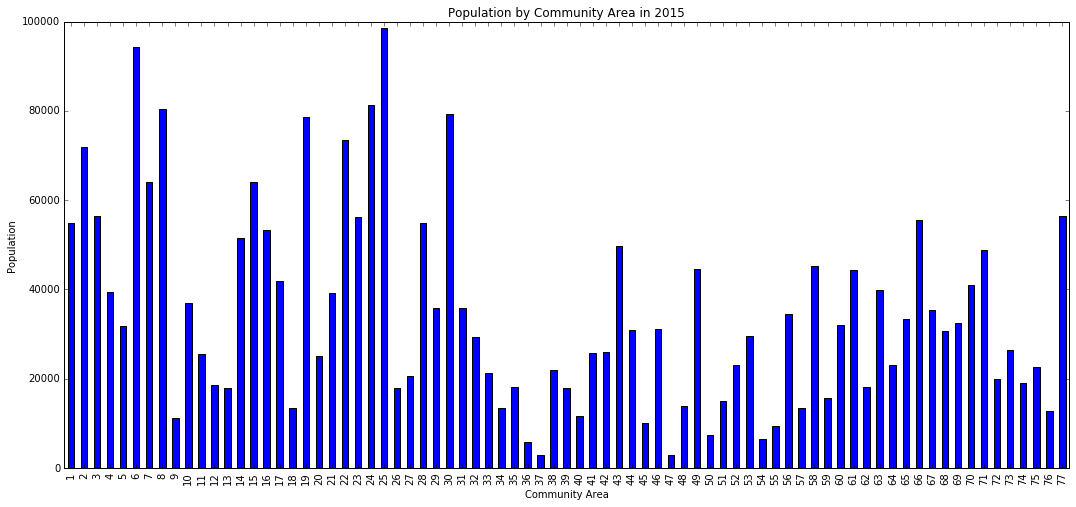

In [23]:
community_pop_sum.plot(kind = 'bar', title = 'Population by Community Area in 2015',
                          legend = False)
plt.xlabel('Community Area')
plt.ylabel('Population')

## Question 3: Crime rates
Using your answer to (2), calculate the crime rate (defined as crime count per thousand capita) for the city in 2015. Then reanswer (1a-d) with crime count replaced by crime rate. Summarize your findings in words.

In [24]:
# Turn series into Data Frame
community_pop_sum = pd.DataFrame({'Population': community_pop_sum})
community_pop_sum

,Population
community_id,
1,54991
2,71942
3,56362
...,...
75,22544
76,12756
77,56521


In [25]:
community_crime_rate = community_crime_count
community_crime_rate['Population'] = community_pop_sum['Population']
community_crime_rate

,Crime Count,Population
Community Area,,
1,3519,54991
2,3059,71942
3,3585,56362
...,...,...
75,2052,22544
76,1622,12756
77,2209,56521


In [26]:
# Calculate the crime rate for the city in 2015
1000 * community_crime_count['Crime Count'].sum() \
/ community_crime_count['Population'].sum()

95.90191119002166

There were approximately 96 crimes per 1,000 people in Chicago in 2015.

### (a): Calculate the crime rate in each Community Area in 2015.

In [27]:
community_crime_rate['Crime Rate'] = 1000 * community_crime_rate['Crime Count'] / community_crime_rate['Population']
community_crime_rate

,Crime Count,Population,Crime Rate
Community Area,,,
1,3519,54991,63.992290
2,3059,71942,42.520364
3,3585,56362,63.606685
...,...,...,...
75,2052,22544,91.022001
76,1622,12756,127.155848
77,2209,56521,39.082819


### (b) Sort the Community Areas by 2015 crime rate. Which Community Area (by name) has the highest crime rate. The lowest?

In [28]:
community_crime_rate['Crime Rate'].sort_values(ascending = False).to_frame()

,Crime Rate
Community Area,
26,321.871007
37,289.986092
27,256.235717
...,...
74,31.844131
12,23.989626
9,22.704925


West Garfield Park (Community Area 26) has the highest crime count, and Edison Park (Community Area 9) the lowest.

### (c) Create a table whose rows are days in the year and columns are the 77 Community Area crime rates. Select a few Communities that you are interested and plot time series.

To do so, I use the same process that I used for question 1, but I start by merging the crimes and population datasets, by Community Area.

In [29]:
# Merge crimes and 'total population by Community Area' datasets
crimes_pop = crimes.merge(community_pop_sum, left_on = 'Community Area', \
                                 right_index = 'community_id')
crimes_pop

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Day,Population
0,10201852,HY389096,2015-01-01 00:00:00,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,26,1159250,1905420,2015,08/20/2015 04:17:37 PM,41.896198,-87.690553,"(41.896197984, -87.690552821)",2015-01-01,81432
37,10306465,HY495263,2015-01-01 00:00:00,014XX N CAMPBELL AVE,1535,OBSCENITY,OBSCENITY,RESIDENCE,False,True,...,17,NaN,NaN,2015,11/10/2015 04:01:54 PM,NaN,NaN,NaN,2015-01-01,81432
111,10042781,HY232132,2015-01-01 00:01:00,019XX W POTOMAC AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,11,1163272,1908668,2015,08/17/2015 03:03:40 PM,41.905027,-87.675689,"(41.905027103, -87.675689369)",2015-01-01,81432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257062,10361471,HY553200,2015-12-28 13:30:00,034XX S WESTERN AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,26,1160920,1881926,2015,01/04/2016 04:02:14 PM,41.831694,-87.685071,"(41.831693663, -87.685070811)",2015-12-28,15612
257063,10361936,HY553609,2015-12-28 13:30:00,034XX S PAULINA ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,11,1165576,1881998,2015,01/04/2016 04:02:14 PM,41.831794,-87.667985,"(41.831793552, -87.667985409)",2015-12-28,15612
257896,10367483,HY554767,2015-12-29 23:00:00,037XX S HONORE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1164632,1879998,2015,01/07/2016 04:14:34 PM,41.826325,-87.671506,"(41.82632535, -87.671505581)",2015-12-29,15612


In [30]:
# Apply function 'to_day' to 'Date', and add column with day
crimes_pop['Day'] = crimes_pop['Date'].apply(to_day)

In [31]:
# Group by both Community Area and Day
crimes_pop_by_CA_day = crimes_pop.groupby(['Community Area', 'Day'])
# Aggregate count by Community Area
crime_rate_by_CA_day = 1000 * crimes_pop_by_CA_day['ID'].agg('count') / \
    crimes_pop_by_CA_day["Population"].agg('mean')

In [32]:
# Unstack to get days on rows and Community Areas on columns
crime_rate_by_CA_day_tseries = crime_rate_by_CA_day.unstack('Community Area')
crime_rate_by_CA_day_tseries

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.236402,0.097301,0.195167,0.101284,0.156902,0.233130,0.187161,0.534268,0.089389,0.135051,...,0.946043,0.705478,0.219079,0.902694,0.099830,0.301967,0.104750,0.221789,0.470367,0.141540
2015-01-02,0.090924,0.125101,0.141940,0.075963,0.062761,0.105968,0.140371,0.335470,NaN,0.054020,...,0.391466,0.644132,0.121711,0.348768,0.049915,0.415204,0.052375,0.088715,0.470367,0.088463
2015-01-03,0.127294,0.152901,0.159682,0.177247,0.125522,0.063581,0.171564,0.335470,0.089389,0.081031,...,0.750310,0.368076,0.194737,0.369284,NaN,0.301967,0.052375,0.310504,0.235183,0.053078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,0.109109,0.097301,0.212909,0.202568,0.094141,0.084774,0.077984,0.310621,NaN,0.027010,...,0.587199,0.490767,0.170395,0.369284,NaN,0.301967,0.157126,0.088715,0.156789,0.070770
2015-12-30,0.090924,0.111201,0.124197,0.101284,0.031380,0.116565,0.233951,0.335470,0.089389,0.162061,...,0.358844,0.705478,0.146053,0.287221,0.099830,0.301967,0.052375,0.310504,0.391972,0.088463
2015-12-31,NaN,NaN,NaN,NaN,NaN,0.010597,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Replace missing values for zeros
crime_rate_by_CA_day_tseries.fillna(0, inplace=True)
crime_rate_by_CA_day_tseries

Community Area,1,2,3,4,5,6,7,8,9,10,...,68,69,70,71,72,73,74,75,76,77
Day,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.236402,0.097301,0.195167,0.101284,0.156902,0.233130,0.187161,0.534268,0.089389,0.135051,...,0.946043,0.705478,0.219079,0.902694,0.099830,0.301967,0.104750,0.221789,0.470367,0.141540
2015-01-02,0.090924,0.125101,0.141940,0.075963,0.062761,0.105968,0.140371,0.335470,0.000000,0.054020,...,0.391466,0.644132,0.121711,0.348768,0.049915,0.415204,0.052375,0.088715,0.470367,0.088463
2015-01-03,0.127294,0.152901,0.159682,0.177247,0.125522,0.063581,0.171564,0.335470,0.089389,0.081031,...,0.750310,0.368076,0.194737,0.369284,0.000000,0.301967,0.052375,0.310504,0.235183,0.053078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-29,0.109109,0.097301,0.212909,0.202568,0.094141,0.084774,0.077984,0.310621,0.000000,0.027010,...,0.587199,0.490767,0.170395,0.369284,0.000000,0.301967,0.157126,0.088715,0.156789,0.070770
2015-12-30,0.090924,0.111201,0.124197,0.101284,0.031380,0.116565,0.233951,0.335470,0.089389,0.162061,...,0.358844,0.705478,0.146053,0.287221,0.099830,0.301967,0.052375,0.310504,0.391972,0.088463
2015-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.010597,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


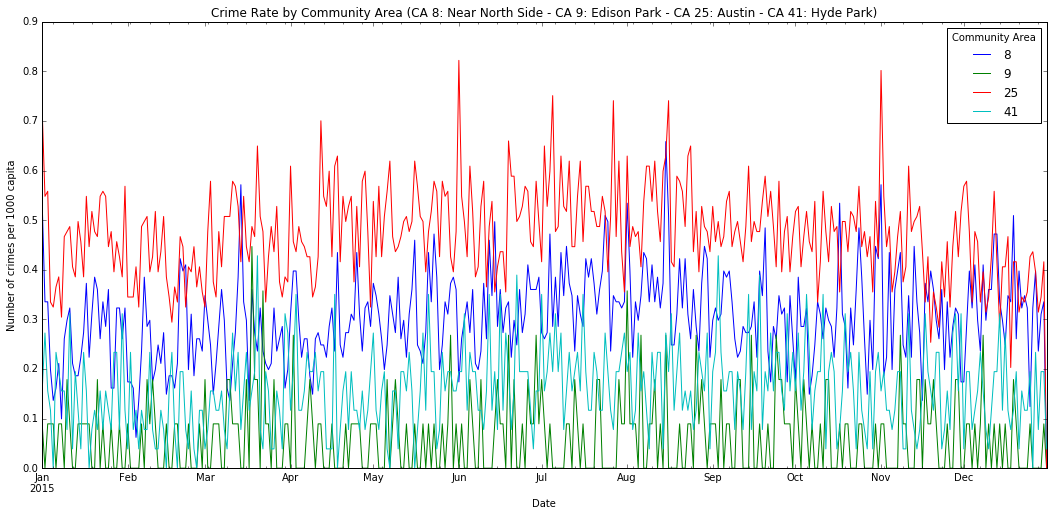

In [34]:
crime_rate_by_CA_day_tseries[[8, 9, 25, 41]].plot(title = \
 'Crime Rate by Community Area (CA 8: Near North Side - CA 9: Edison Park - CA 25: Austin - CA 41: Hyde Park)')
plt.xlabel('Date')
plt.ylabel('Number of crimes per 1000 capita')

### (d) By joining with the socioeconomic data, create a scatter plot of crime rate against per capita income. Summarize the relationship in words.

In [35]:
# Merge 'socioeconomic' and 'socioeconomic_crime_rate' datasets by Community Area.
socioeconomic_crime_rate = socioeconomic.merge(community_crime_rate, 
                                          left_on='Community Area Number', right_index = 'Community Area')
socioeconomic_crime_rate

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Crime Count,Population,Crime Rate
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39,3519,54991,63.992290
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46,3059,71942,42.520364
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20,3585,56362,63.606685
...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30,2052,22544,91.022001
75,76,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24,1622,12756,127.155848
76,77,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19,2209,56521,39.082819


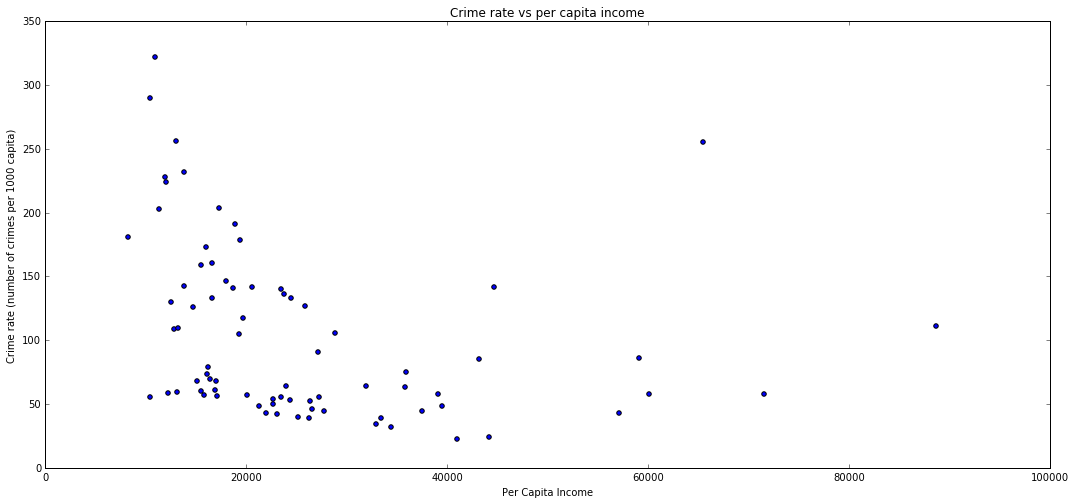

In [36]:
socioeconomic_crime_rate.plot(kind = 'scatter', x = 'PER CAPITA INCOME ',
                         y = 'Crime Rate', 
                              title = 'Crime rate vs per capita income')
plt.ylabel("Crime rate (number of crimes per 1000 capita)")
plt.xlabel("Per Capita Income")

This plot shows more clearly a negative relation between per capita income and crime rate, than the previous scatter plot of per capita income vs number of crimes.

There are several outliers, which corroborate the intiuition that in certain Community Areas in which income per capita is high, there is also a high crime incidence. I can think of at least two reasons why this is intuitive : (1) high end commercial and touristic spots are attractive for criminals, and (2) people with high income might be more likely to report crimes than people with low income.

## Question 4: Crime and Police Stations
Download the police stations data.

In [37]:
police_stations = pd.read_csv('Police_Stations.csv')
police_stations

,DISTRICT,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION
0,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,https://portal.chicagopolice.org/portal/page/p...,NaN,NaN,NaN,"3510 S Michigan Ave Chicago, IL 60653 (41.8308..."
1,1,1718 S State St,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087..."
2,2,5101 S Wentworth Ave,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801..."
...,...,...,...,...,...,...,...,...,...,...
20,22,1900 W Monterey Ave,Chicago,IL,60643,https://portal.chicagopolice.org/portal/page/p...,312-745-0710,312-745-0814,312-745-0569,"1900 Monterey Ave\nChicago, IL 60643\n(41.6913..."
21,24,6464 N Clark St,Chicago,IL,60626,https://portal.chicagopolice.org/portal/page/p...,312-744-5907,312-744-6928,312-744-7603,"6464 Clark St\nChicago, IL 60626\n(41.99944797..."
22,25,5555 W Grand Ave,Chicago,IL,60639,https://portal.chicagopolice.org/portal/page/p...,312-746-8605,312-746-4353,312-746-8383,"5555 Grand Ave\nChicago, IL 60639\n(41.9184858..."


### (a) Extract the latitudes and longitudes of the police stations (found in the LOCATION column) as floats into their own columns called 'Station Latitude' and 'Station Longitude', respectively.

In [38]:
# Inspect the structure of the LOCATION column
for i in range(0,len(police_stations)):
    print(police_stations['LOCATION'][0], end = '')

3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62330200626332)
3510 S Michigan Ave Chicago, IL 60653 (41.83086072588734, -87.62

In [39]:
# Extract lat and long using regular expressions
import re

# Example for value in the first row in the table
# For latitude, extract every character after '(' and before ','
x = re.findall('\(([^,]*)', police_stations['LOCATION'][0])
# For longitude, extract every character before ')' and after ' '
y = re.findall('(\S+)\)', police_stations['LOCATION'][0])
print(x, y)

['41.83086072588734'] ['-87.62330200626332']


In [40]:
# Define functions to extract lat and long as floats
def get_lat(x):
    return float(re.findall('\(([^,]*)', x)[0])

def get_long(x):
    return float(re.findall('(\S+)\)', x)[0])

In [41]:
# Apply functions to LOCATION column, and store output in defined columns
police_stations['Station Latitude'] = police_stations['LOCATION'].apply(get_lat)
police_stations['Station Longitude'] = police_stations['LOCATION'].apply(get_long)
police_stations

,DISTRICT,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION,Station Latitude,Station Longitude
0,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,https://portal.chicagopolice.org/portal/page/p...,NaN,NaN,NaN,"3510 S Michigan Ave Chicago, IL 60653 (41.8308...",41.830861,-87.623302
1,1,1718 S State St,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343
2,2,5101 S Wentworth Ave,Chicago,IL,60609,https://portal.chicagopolice.org/portal/page/p...,312-747-8366,312-747-5396,312-747-6656,"5101 Wentworth Ave\nChicago, IL 60609\n(41.801...",41.801774,-87.630664
...,...,...,...,...,...,...,...,...,...,...,...,...
20,22,1900 W Monterey Ave,Chicago,IL,60643,https://portal.chicagopolice.org/portal/page/p...,312-745-0710,312-745-0814,312-745-0569,"1900 Monterey Ave\nChicago, IL 60643\n(41.6913...",41.691350,-87.668558
21,24,6464 N Clark St,Chicago,IL,60626,https://portal.chicagopolice.org/portal/page/p...,312-744-5907,312-744-6928,312-744-7603,"6464 Clark St\nChicago, IL 60626\n(41.99944797...",41.999448,-87.671186
22,25,5555 W Grand Ave,Chicago,IL,60639,https://portal.chicagopolice.org/portal/page/p...,312-746-8605,312-746-4353,312-746-8383,"5555 Grand Ave\nChicago, IL 60639\n(41.9184858...",41.918486,-87.764654


### (b) Join the crime data with the stations on police district. Hint: the station district is a text field (because one of them is 'Headquarters') so you'll need to convert the crime district to the same.

In [42]:
# Change column type to string
crimes['District'] = crimes['District'].astype(str)

In [43]:
police_stations.columns

Index(['DISTRICT', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'WEBSITE', 'PHONE',
       'FAX', 'TTY', 'LOCATION', 'Station Latitude', 'Station Longitude'],
      dtype='object')

In [44]:
police_stations = police_stations.rename(columns = {'DISTRICT': 'District'})

In [45]:
# Merge 'crimes' and 'police_stations' datasets by police district.
crimes_stations = pd.merge(crimes, police_stations, on = 'District')
crimes_stations

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION,Station Latitude,Station Longitude
0,10201852,HY389096,2015-01-01 00:00:00,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,Chicago,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158
1,10298217,HY486593,2015-01-01 00:00:00,013XX S THROOP ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,STREET,False,False,...,Chicago,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158
2,10306755,HY495605,2015-01-01 00:00:00,017XX W 17TH ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,Chicago,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258506,10364160,HY555965,2015-12-30 20:10:00,0000X W WASHINGTON ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,GOVERNMENT BUILDING/PROPERTY,False,False,...,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343
258507,10369397,HZ105535,2015-12-30 22:30:00,019XX S INDIANA AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER,False,True,...,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343
258508,10369351,HZ105321,2015-12-31 00:00:00,0000X W RANDOLPH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,Chicago,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343


### (c) Define a function which calculates the distance in kilometers between two points (latitude, longitude) using the Pythagorean theorem.

Hint: To convert the coordinate distance to kilometers multiply by 95. For example the distance from (41, -87) to (41.1,-87) is about 9.5km. This is the scale factor for these coordinates near Chicago. Note this method is approximate because the scale factor varies from point to point (i.e. the Earth is not flat!).

In [46]:
def lat_long_distance(row):

    import math
    x1 = row['Latitude']
    y1 = row['Longitude']
    x2 = row['Station Latitude']
    y2 = row['Station Longitude']
    
    distance = math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) * 95
    
    return distance

### (d) Calculate the distance between each crime and its district police station. Hint: If your answer to (c) is of the form

In [47]:
crimes_stations['Distance'] = crimes_stations.apply(lat_long_distance, axis=1)
crimes_stations

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,LOCATION,Station Latitude,Station Longitude,Distance
0,10201852,HY389096,2015-01-01 00:00:00,008XX N MAPLEWOOD AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,...,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158,3.513199
1,10298217,HY486593,2015-01-01 00:00:00,013XX S THROOP ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,STREET,False,False,...,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158,NaN
2,10306755,HY495605,2015-01-01 00:00:00,017XX W 17TH ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,IL,60607,https://portal.chicagopolice.org/portal/page/p...,312-746-8309,312-746-4248,312-746-9868,"100 Racine Ave\nChicago, IL 60607\n(41.8803114...",41.880311,-87.657158,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258506,10364160,HY555965,2015-12-30 20:10:00,0000X W WASHINGTON ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,GOVERNMENT BUILDING/PROPERTY,False,False,...,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343,2.332298
258507,10369397,HZ105535,2015-12-30 22:30:00,019XX S INDIANA AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,OTHER,False,True,...,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343,0.536186
258508,10369351,HZ105321,2015-12-31 00:00:00,0000X W RANDOLPH ST,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,...,IL,60616,https://portal.chicagopolice.org/portal/page/p...,312-745-4290,312-745-3694,312-745-3693,"1718 State St\nChicago, IL 60616\n(41.85882087...",41.858821,-87.627343,2.441548


### (e) Plot a histogram of crime count against distance to district police station. Summarize the relationship in words.

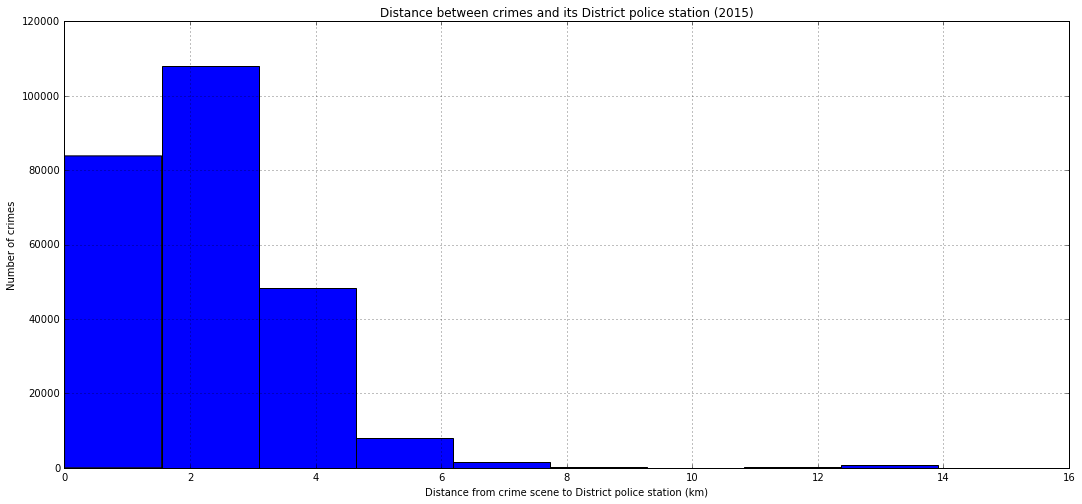

In [48]:
crimes_stations["Distance"].hist()
plt.title("Distance between crimes and its District police station (2015)")
plt.ylabel("Number of crimes")
plt.xlabel("Distance from crime scene to District police station (km)")

The vast majority of the crimes committed in Chicago in 2015 were committed at scenes located less than 5 kilometers from the District's police station. The highest frequency is observed for scenes between 2 to 3 kilometers from it.

Very few crimes where committed more than 6 kilometers away from the District's police station.